# Modeling stock returns' volatility with ARCH models

## How to do it

### 1. Import the libraries

In [6]:
import pandas as pd
import yfinance as yf
from arch import arch_model

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Specify the risky asset and the time horizon

In [2]:
RISKT_ASSET = 'GOOG'
START_DATE = '2015-01-01'
END_DATE = '2021-12-31'

### 3. Download data from Yahoo Finance

In [4]:
df = yf.download(
    RISKT_ASSET,
    start=START_DATE,
    end=END_DATE
)
print(f"Download {df.shape[0]} rows of data.")

[*********************100%***********************]  1 of 1 completed
Download 1762 rows of data.


### 4. Calculate the daily returns

Average return: 0.11%


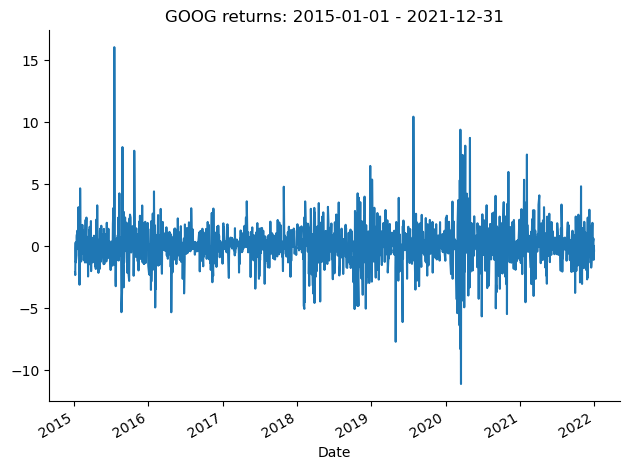

In [7]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
print(f'Average return: {round(returns.mean(), 2)}%')
returns.plot(title=f"{RISKT_ASSET} returns: {START_DATE} - {END_DATE}")

sns.despine()
plt.tight_layout()

### 5. Specify the ARCH model

In [9]:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1)

### 6. Estimate the model and print the summary

In [10]:
fitted_model = model.fit(disp='off')
print(fitted_model.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3245.30
Distribution:                  Normal   AIC:                           6496.61
Method:            Maximum Likelihood   BIC:                           6513.03
                                        No. Observations:                 1761
Date:                Sat, Jul 22 2023   Df Residuals:                     1761
Time:                        23:27:14   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2878      0.187      1.540      0.123 [-7.83

### 7. Plot the residuals and the conditional volatility

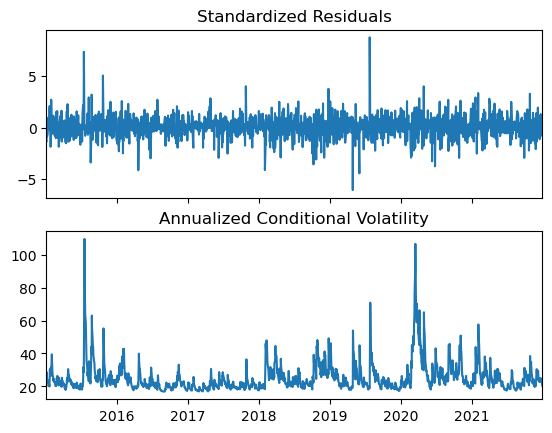

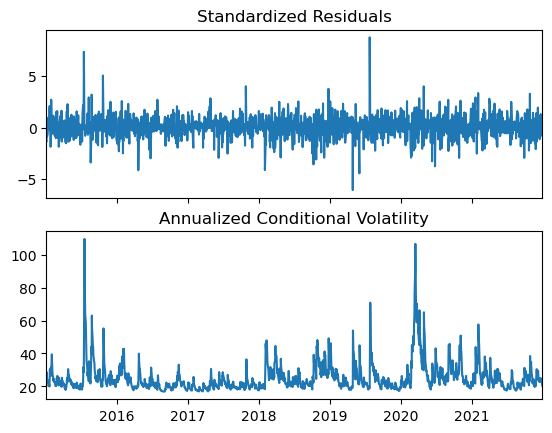

In [12]:
fitted_model.plot(annualize='D')

In the cell below we confirm that the standardized residuals are simply residuals devided by the conditional volatility.

In [13]:
diagnostics_dict = {
    'resids' : fitted_model.resid,
    'conditional_volatility' : fitted_model.conditional_volatility,
    'std_resid' : fitted_model.std_resid,
    'std_resid_manual' : fitted_model.resid / fitted_model.conditional_volatility 
}

df_diagnostics = pd.DataFrame(diagnostics_dict)
df_diagnostics 

,resids,conditional_volatility,std_resid,std_resid_manual
Date,,,,
2015-01-05,-2.084562,1.556696,-1.339094,-1.339094
2015-01-06,-2.317709,1.674964,-1.383737,-1.383737
2015-01-07,-0.171323,1.805739,-0.094877,-0.094877
2015-01-08,0.315304,1.638456,0.192440,0.192440
2015-01-09,-1.295055,1.507930,-0.858830,-0.858830
...,...,...,...,...
2021-12-23,0.131676,1.559861,0.084415,0.084415
2021-12-27,0.626259,1.440655,0.434705,0.434705
2021-12-28,-1.091418,1.370028,-0.796639,-0.796639


## There's more

In [14]:
# test the residuals of the ARCH(1) model with the LM test

from statsmodels.stats.diagnostic import het_arch
het_arch(fitted_model.resid)

(98.0392333043715,
 1.3442180956397658e-16,
 10.320164240233172,
 4.3555001424860615e-17)

# Modeling stock returns' volatility with GARCH models

## How to do it

### 1. Specify the GARCH model

In [15]:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1)

### 2. Estimate the model and print the summary

In [16]:
fitted_model = model.fit(disp='off')
print(fitted_model.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3245.30
Distribution:                  Normal   AIC:                           6496.61
Method:            Maximum Likelihood   BIC:                           6513.03
                                        No. Observations:                 1761
Date:                Sun, Jul 23 2023   Df Residuals:                     1761
Time:                        21:10:29   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2878      0.187      1.540      0.123 [-7.83

### 3. Plot the residuals and the conditional volatility

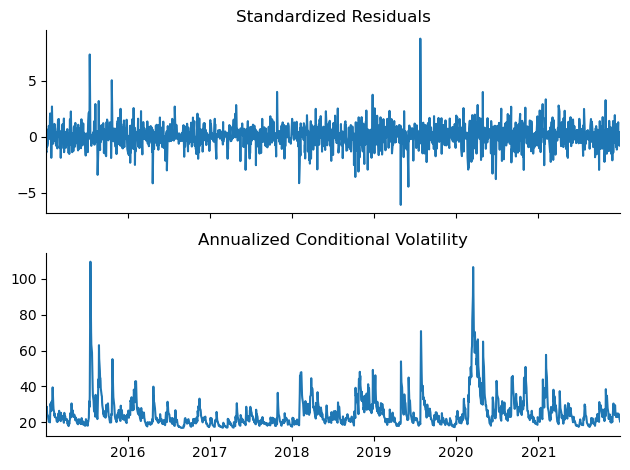

In [17]:
fitted_model.plot(annualize='D')

sns.despine()
plt.tight_layout()

# Forecasting volatility using GARCH models

## How to do it

### 1. Import the libraries

In [18]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from arch import arch_model

### 2. Download data from Yahoo Finance and calculate simple returns

In [19]:
df = yf.download(
    "MSFT",
    start="2015-01-01",
    end="2021-12-31"
)

returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'

[*********************100%***********************]  1 of 1 completed


### 3. Specify the GARCH model

In [20]:
model = arch_model(returns, mean='Zero', vol='GARCH', dist='t', p=1, q=1)

### 4. Define the split data and fit the model

In [21]:
SPLIT_DATE = datetime(2021, 1, 1)
fitted_model = model.fit(last_obs=SPLIT_DATE, disp='off')

### 5. Create and inspect the analytical forecasts

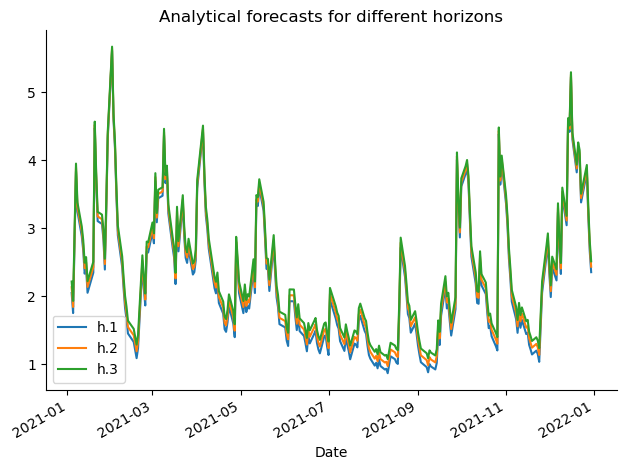

In [22]:
forecasts_analytical = fitted_model.forecast(
    horizon=3,
    start=SPLIT_DATE,
    reindex=False
)

forecasts_analytical.variance.plot(
    title='Analytical forecasts for different horizons'
)

sns.despine()
plt.tight_layout()

In [23]:
forecasts_analytical.variance

,h.1,h.2,h.3
Date,,,
2021-01-04,2.048953,2.134409,2.218510
2021-01-05,1.754026,1.844160,1.932864
2021-01-06,2.770887,2.844892,2.917723
2021-01-07,3.838363,3.895436,3.951603
2021-01-08,3.248836,3.315260,3.380630
...,...,...,...
2021-12-23,3.380798,3.445129,3.508439
2021-12-27,3.817177,3.874586,3.931084
2021-12-28,3.185605,3.253032,3.319389


### 6. Create and inspect the simulation forecasts

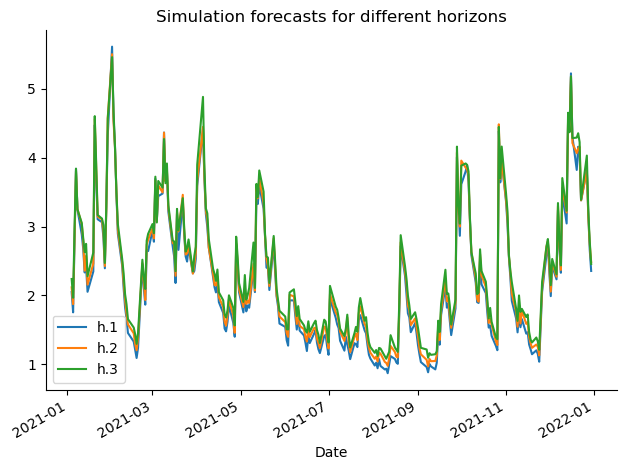

In [24]:
forecasts_simulation = fitted_model.forecast(
    horizon=3,
    start=SPLIT_DATE,
    method='simulation',
    reindex=False,
)

forecasts_simulation.variance.plot(
    title='Simulation forecasts for different horizons'
)

sns.despine()
plt.tight_layout()

In [25]:
forecasts_simulation.variance

,h.1,h.2,h.3
Date,,,
2021-01-04,2.048953,2.117262,2.238617
2021-01-05,1.754026,1.873957,1.966206
2021-01-06,2.770887,2.851809,2.971322
2021-01-07,3.838363,3.808014,3.841368
2021-01-08,3.248836,3.254260,3.251609
...,...,...,...
2021-12-23,3.380798,3.380692,3.388626
2021-12-27,3.817177,3.808834,4.031093
2021-12-28,3.185605,3.157364,3.237076


### 7. Create and inspect the bootstrap forecasts

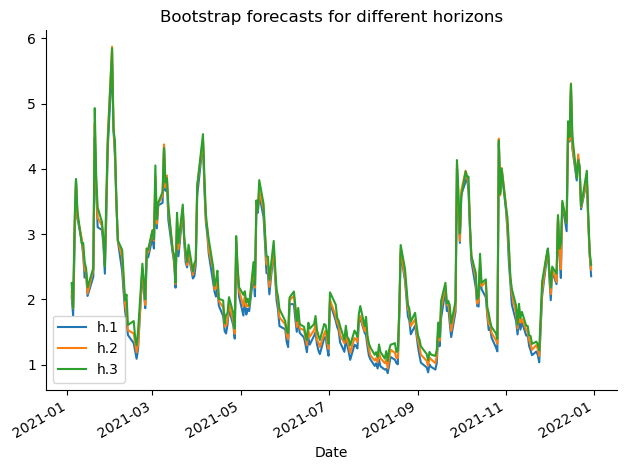

In [26]:
forecasts_bootstrp = fitted_model.forecast(
    horizon=3,
    start=SPLIT_DATE,
    method='bootstrap',
    reindex=False,
)

forecasts_bootstrp.variance.plot(
    title='Bootstrap forecasts for different horizons'
)

sns.despine()
plt.tight_layout()

In [27]:
forecasts_bootstrp.variance

,h.1,h.2,h.3
Date,,,
2021-01-04,2.048953,2.122802,2.251963
2021-01-05,1.754026,1.866814,1.872500
2021-01-06,2.770887,2.982298,3.201319
2021-01-07,3.838363,3.812790,3.843969
2021-01-08,3.248836,3.269266,3.350819
...,...,...,...
2021-12-23,3.380798,3.414000,3.424592
2021-12-27,3.817177,3.842341,3.971517
2021-12-28,3.185605,3.197725,3.292002


## There's more

### 1. Import the libraries

In [28]:
import numpy as np

### 2. Estimate the 10-step ahead volatility forecasts for 2020 using the analytical and bootstrap approaches

In [31]:
# define the forecast horizon
FCST_HORIZON = 10

vol_analytic = (
    fitted_model.forecast(
        horizon=FCST_HORIZON,
        start=datetime(2020, 1, 1),
        reindex=False
    )
    .residual_variance['2020']
    .apply(np.sqrt)
)

vol_bootstrap = (
    fitted_model.forecast(
        horizon=FCST_HORIZON,
        start=datetime(2020, 1, 1),
        method='bootstrap',
        reindex=False
    )
    .residual_variance['2020']
    .apply(np.sqrt)
)

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_83552/1360988280.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fitted_model.forecast(
/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_83552/1360988280.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fitted_model.forecast(


### 3. Get the conditional volatility for 2020

In [32]:
vol = fitted_model.conditional_volatility['2020']

### 4. Create the hedgehog plot

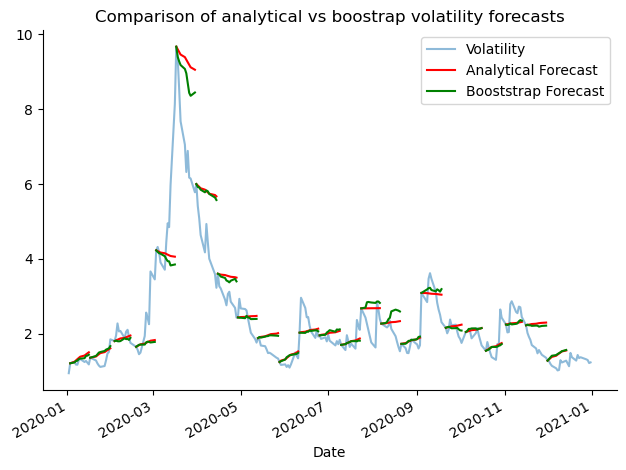

In [33]:
ax = vol.plot(
    title='Comparison of analytical vs boostrap volatility forecasts',
    alpha=0.5
)

ind = vol.index

for i in range(0, 240, 10):
    vol_a = vol_analytic.iloc[i]
    vol_b = vol_bootstrap.iloc[i]
    start_loc = ind.get_loc(vol_a.name)
    new_ind = ind[(start_loc+1):(start_loc+FCST_HORIZON+1)]
    vol_a.index = new_ind
    vol_b.index = new_ind
    ax.plot(vol_a, color='r')
    ax.plot(vol_b, color='g')

labels = ['Volatility', 'Analytical Forecast', 'Booststrap Forecast']
legend = ax.legend(labels)

sns.despine()
plt.tight_layout()

# Multivariate volatility forecasting with the CCC-GARCH model

## How to do it

### 1. Import the libraries

In [34]:
import pandas as pd
import numpy as np
import yfinance as yf
from arch import arch_model

### 2. Specify the risky asset and the time horizon

In [35]:
RISKT_ASSET = ['GOOG', 'MSFT', 'AAPL']
START_DATE = '2015-01-01'
END_DATE = '2021-12-31'

### 3. Download data from Yahoo Finance

In [36]:
df = yf.download(
    RISKT_ASSET,
    start=START_DATE,
    end=END_DATE
)

print(f'Dowlonaded {df.shape[0]} rows of data.')

[*********************100%***********************]  3 of 3 completed
Dowlonaded 1762 rows of data.


### 4. Calculate daily returns

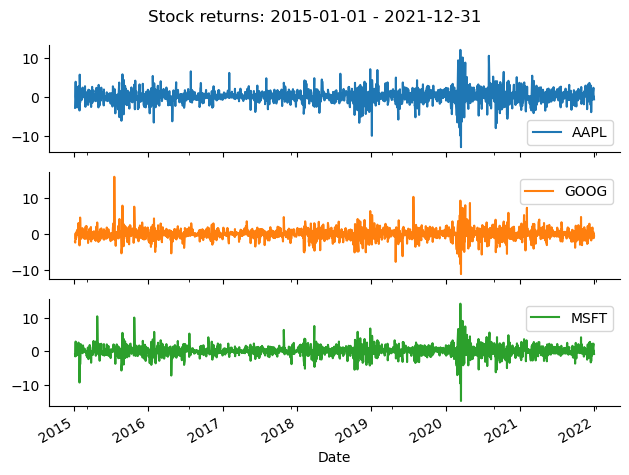

In [37]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.plot(
    subplots=True,
    title=f"Stock returns: {START_DATE} - {END_DATE}"
)

sns.despine()
plt.tight_layout()

### 5. Define lists for storing objects

In [38]:
coeffs = []     # GARCH coefficients
cond_vol = []   # conditional volatilities
std_resids = [] # standardized residuals
models = []     # the models used for forecasting

### 6. Estimate the univariate GARCH models

In [39]:
for asset in returns.columns :
    # specify and fit the model
    model = arch_model(returns[asset], mean='Constant', vol='GARCH', p=1, q=1)
    model = model.fit(update_freq=0, disp='off')

    # store results in the lists
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.std_resid)
    models.append(model)

### 7. Store the results in DataFrame

In [42]:
coeffs_df = pd.DataFrame(coeffs, index=returns.columns)
cond_vol_df = (
    pd.DataFrame(cond_vol)
    .transpose()
    .set_axis(returns.columns, axis='columns')
)
std_resids_df = (
    pd.DataFrame(std_resids)
    .transpose()
    .set_axis(returns.columns, axis='columns')
)

In [41]:
coeffs_df

,mu,omega,alpha[1],beta[1]
AAPL,0.189582,0.176259,0.134657,0.811613
GOOG,0.125469,0.305893,0.183854,0.715030
MSFT,0.149252,0.267583,0.213114,0.700490


### 8. Calculate the constant conditional correlation matrix ($R$)

In [43]:
R = (
    std_resids_df
    .transpose()
    .dot(std_resids_df)
    .div(len(std_resids_df))
)

### 9. Calculate the 1-step ahead forecast of the conditional covariance matrix

In [44]:
# define objects
diag = []
D = np.zeros((len(RISKT_ASSET), len(RISKT_ASSET)))

# populate the list with conditional variances
for model in models:
    diag.append(model.forecast(horizon=1).variance.iloc[-1, 0])

# take the square root to obtain volatility from variance
diag = np.sqrt(diag)

# fill the diagonal of D with values from diag
np.fill_diagonal(D, diag)

# calculate the conditional covariance matrix
H = np.matmul(np.matmul(D, R.values), D)

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this 

In [45]:
H

array([[2.39811381, 1.00565297, 1.19870137],
       [1.00565297, 1.51518014, 1.12098057],
       [1.19870137, 1.12098057, 1.87602544]])